Il nomogramma di Fagan semplifica l'interpretazione delle Likelihood Ratios di un test, segno o sintomo, data la probabilità di malattia priori, indicando la risultante probabilità di malattia a posteriori <cite data-cite="franco2016rapporto"></cite> <cite data-cite="caraguel2013two"></cite> fornendo uno strumento grafico di facile utilizzo senza la necessità di effettuare calcoli.

Costruiamo passo per passo un nomogramma di Fagan con `matplotlib` in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Markdown

Sappiamo che gli Odds a posteriori $\mathbf{O_{po}}$ dato il risultato di un test $\odot$ (o la presenza di un segno o di un sintomo) sono pari alla Likelihood Ratio $\mathbf{LR}$ del test (o del segno/sintomo) moltiplicato per gli Odds a priori $\mathbf{O_{pr}}$

$$
\mathbf{O_{po}} = \mathbf{LR} \cdot \mathbf{O_{pr}}
$$

La relazione tra Odds e Probabilità è $\mathbf{O} = P / (1 - P)$, possiamo dunque dire che

$$
\frac{\mathbf{Po}}{1 - \mathbf{Po}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

dove $\mathbf{Po}$ è la probabilità di malattia a posteriori dato il risultato del test $\mathbf{Po} = P(M|\odot)$ e $\mathbf{Pr}$ è la probabilità di malattia a priori $\mathbf{Pr} = P(M)$

I tre termini di questa equazione rappresentano la base dei tre assi dei nomogramma di Fagan che lega probabilità a priori e a posteriori di malattia in base alla Likelihood Ratio. In particolare, volendo porre a sinistra nel nomogramma l'asse delle probabilità a priori, a destra l'asse delle probabilità a posteriori e al centro l'asse delle Likelhood Ratios, possiamo riscrivere

$$
\frac{\mathbf{Pr}}{1 - \mathbf{Pr}} = \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}}
$$

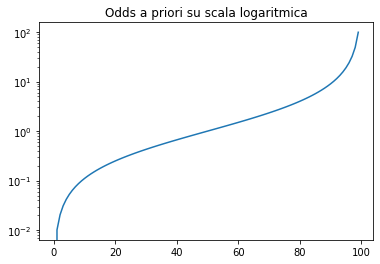

In [2]:
Pr = np.linspace(0, 1, 101)
Opr = Pr/(1-Pr)
clear_output()
plt.plot(Opr)
plt.yscale("log")
plt.title("Odds a priori su scala logaritmica");

Data la natura logaritmica degli Odds, useremo scale logaritmiche per tutti gli assi e dunque riscriviamo

$$
\log \left( \frac{\mathbf{Pr}}{1 - \mathbf{Pr}} \right) = 
\log \left( \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}} \right)
$$

Impostiamo la base del nomogramma, ponendo i tre assi ad $x=\{-1, 0, 1\}$ e impostando come limite per l'asse y l'intero più vicino al logaritmo del massimo e del minimo Odd che vogliamo usare

$$
\mathbf{O}_{max} = \log \left( \frac{P_{max}}{1 - P_{max}} \right)
$$

$$
\mathbf{O}_{min} = \log \left( \frac{P_{min}}{1 - P_{min}} \right)
$$

dove sceglieremo $P_{max}=99.9\%=.999$ e $P_{min}=0.1\%=0.001$ dunque


$$
\mathbf{O}_{max} = 7.00
$$

$$
\mathbf{O}_{min} = -7.00
$$


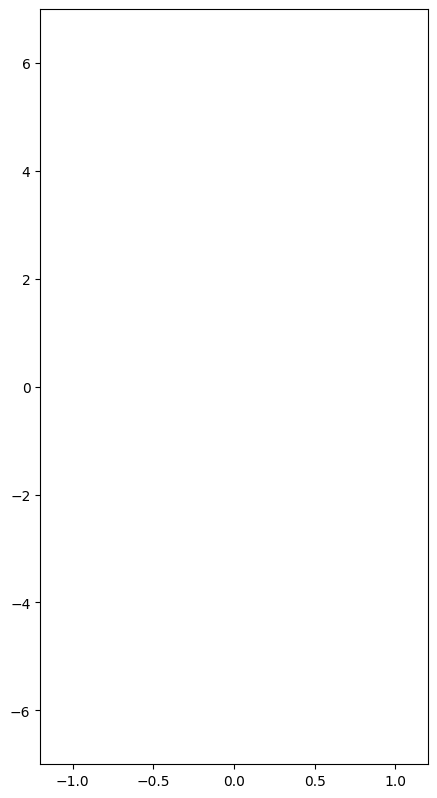

In [3]:
Pmax = .999
Pmin = .001
Omax = np.ceil(np.log(Pmax/(1-Pmax)))
Omin = np.floor(np.log(Pmin/(1-Pmin)))
display(Markdown(fr"""
$$
\mathbf{{O}}_{{max}} = {Omax:.2f}
$$

$$
\mathbf{{O}}_{{min}} = {Omin:.2f}
$$
"""))

fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)
plt.show();

Iniziamo a disegnare il primo asse del nomogramma delle $\mathbf{Pr}$ probabilità a priori, alle ascisse $x=-1$. I segni sull'asse corrisponderanno agli Odds mentre le etichette alle Probabilità.

Scegliamo un vettore di Probabilità per i segni/etichette maggiori che vogliamo visualizzare e calcoliamo i corrispondenti valori Odds, ad esempio:

In [4]:
Pticks = np.sort(np.concatenate([
    np.arange(.1, .999, .1),
    np.arange(.08, 0, -.02),
    np.arange(.01, 0, -.002),
    np.arange(.92, .999, +.02),
    np.arange(.99, .999, +.002),
    [.001, .999]
]))
print(f"Etichette Probabilità: {Pticks}")

Etichette Probabilità: [0.001 0.002 0.004 0.006 0.008 0.01  0.02  0.04  0.06  0.08  0.1   0.2
 0.3   0.4   0.5   0.6   0.7   0.8   0.9   0.92  0.94  0.96  0.98  0.99
 0.992 0.994 0.996 0.998 0.999]


In [5]:
Oticks = Pticks / (1 - Pticks)
print(f"Etichette Odds: {Oticks}")

Etichette Odds: [1.00100100e-03 2.00400802e-03 4.01606426e-03 6.03621730e-03
 8.06451613e-03 1.01010101e-02 2.04081633e-02 4.16666667e-02
 6.38297872e-02 8.69565217e-02 1.11111111e-01 2.50000000e-01
 4.28571429e-01 6.66666667e-01 1.00000000e+00 1.50000000e+00
 2.33333333e+00 4.00000000e+00 9.00000000e+00 1.15000000e+01
 1.56666667e+01 2.40000000e+01 4.90000000e+01 9.90000000e+01
 1.24000000e+02 1.65666667e+02 2.49000000e+02 4.99000000e+02
 9.99000000e+02]


e applichiamolo al primo asse, ricordando la relazione tra Odds e Probabilità e la scala logaritmica

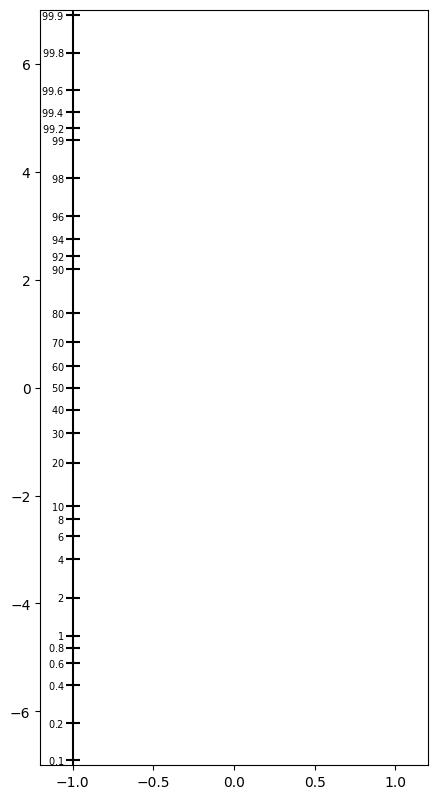

In [6]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )
plt.show();

Applichiamo il medesimo ragionamento per l'asse destro delle probabilità a posteriori, ma invertendone i valori.

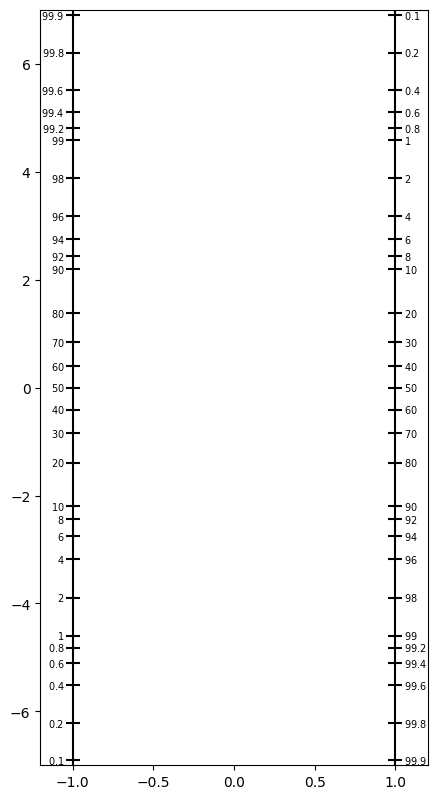

In [7]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )
plt.show();

Occupiamoci ora dell'asse centrale delle Likelihood Ratios, scegliendo alcuni valori notevoli per i segni maggiori da mostrare. Ad esempio, le potenze di 10 da -3 a 3.

In [8]:
Lticks = [10 ** int(i) for i in np.arange(-3, 3.1, 1)]
print(f"Etichette Likelihood Ratios: {Lticks}")

Etichette Likelihood Ratios: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


Per posizionare i segni notiamo che i valori a priori e a posteriori sono complementari lungo l'asse $x$ (avevamo infatto invertito l'asse destro)

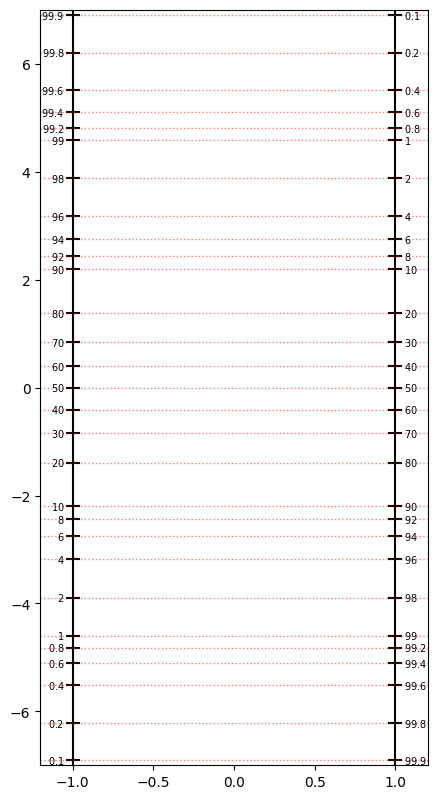

In [9]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

# Valori complementari esempio
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

Pertanto è sufficiente risolvere l'equazione

$$
\frac{1 - \mathbf{Pr}}{\mathbf{Pr}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

da cui otteniamo

$$
\mathbf{Pr} = \frac{1}{1 + \sqrt{\mathbf{LR}}}
$$

e calcolare poi i corrispondenti Odds per ottenere il valore della coordinata sull'asse $y$ del contenitore

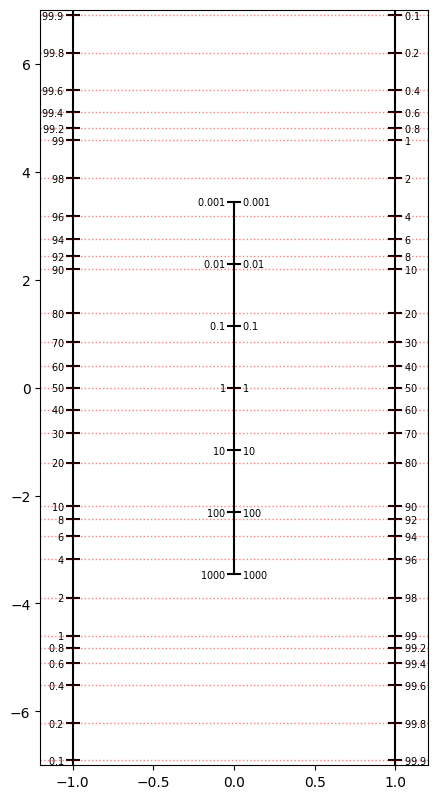

In [10]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")
    
# Valori complementari esempio
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

Possiamo ora aggiungere dei segni minori sull'asse di $\mathbf{LR}$ e rimuovere le linee verticali dei valori complementari

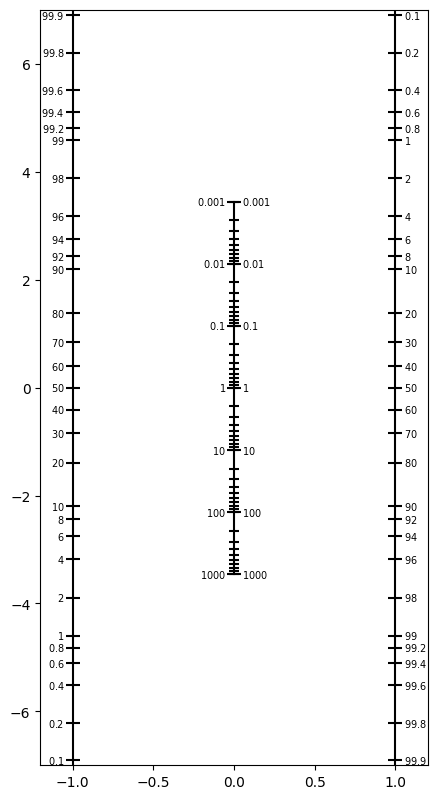

In [11]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

plt.show();

Gli assi del nomogramma sono completi, rimuoviamo i valori di ascisse e coordinate del contenitore, aggiungiamo titolo ed etichette degli assi del nomogramma

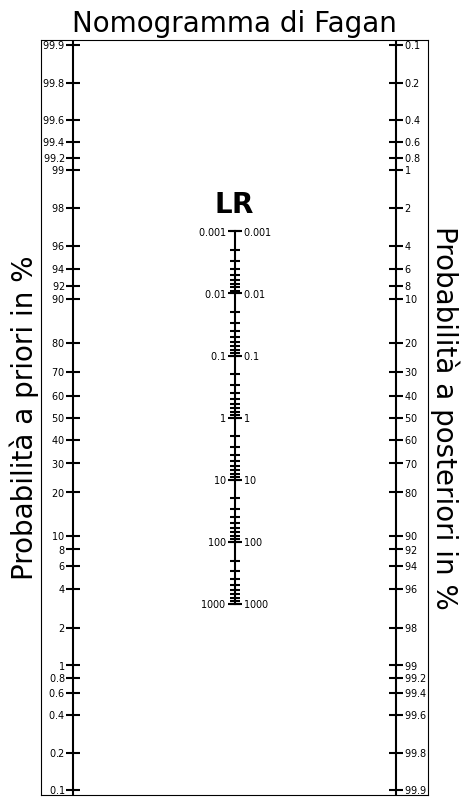

In [12]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Nomogramma di Fagan", fontsize=20)
ax.text(-1.3, 0, "Probabilità a priori in %", ha="center", va="center", fontsize=20, rotation=90)
ax.text(+1.3, 0, "Probabilità a posteriori in %", ha="center", va="center", fontsize=20, rotation=270)
ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)

plt.show();

Possiamo ora testarlo per alcuni valori di Probabilità a priori e Likelihood Ratio, ricordando che i valori a priori e posteriori sono complementari sui due assi dunque la funzione per determinare la coordinata $y$ della Probabilità a posteriori sarà

$$
\log \left(
    \frac{\mathbf{Pr}}{1-\mathbf{Pr}}
    \right)
=
\log \left(
    \frac{1}{\mathbf{LR}} \cdot \frac{1-\mathbf{Po}}{\mathbf{Po}}
    \right)
$$

In [13]:
def Fagan(draw=[]):
    fig, ax = plt.subplots(figsize=(5,10), dpi=100)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(Omin, Omax)

    ax.axvline(-1, c="k")
    ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            -1.05, np.log(Otick),
            f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
            fontsize=7, va="center", ha="right"
        )

    ax.axvline(+1, c="k")
    ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            +1.05, np.log(Otick),
            f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
            fontsize=7, va="center", ha="left"
        )

    Ops = []
    for Ltick in Lticks:
        Op = 1 / (np.sqrt(Ltick) + 1)
        Ops.append(Op)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
        ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
        ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
        minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
        for minor in minors:
            if minor < .001:
                continue
            Op = 1 / (np.sqrt(minor) + 1)
            ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
    ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Nomogramma di Fagan", fontsize=20)
    ax.text(-1.3, 0, "Probabilità a priori in %", ha="center", va="center", fontsize=20, rotation=90)
    ax.text(+1.3, 0, "Probabilità a posteriori in %", ha="center", va="center", fontsize=20, rotation=270)
    ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)
    
    for line in draw:
        Opo = line[1] * (line[0]/(1-line[0]))
        Ppo = Opo/(1+Opo)
        print(f"Pr:{line[0]:>7.2%}  LR:{line[1]:>7.2f}  Po:{Ppo:>7.2%}")
        ax.plot(
            [-1, 1], [np.log(line[0]/(1-line[0])), np.log((1-line[0])/(line[0]*line[1]))]
        )

    plt.show();

Pr:  2.00%  LR: 100.00  Po: 67.11%
Pr: 99.00%  LR:  10.00  Po: 99.90%
Pr: 30.00%  LR:   0.02  Po:  0.85%


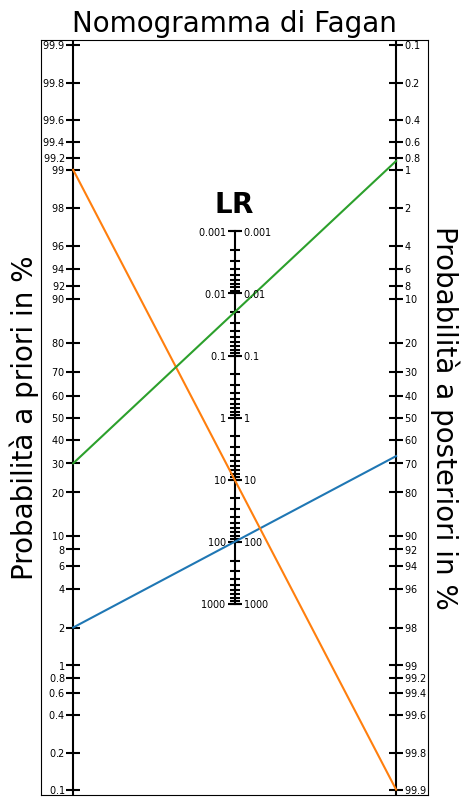

In [14]:
Fagan(
    draw=[
        [.02, 100],
        [.99, 10],
        [.3, .02]
    ]
)

Il nomogramma è completo e corretto.